In [34]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

# <b> Exploratory Data Analytics </b>

### Gain familiarity with Data Set

In [5]:
df = pd.read_csv("reviews_prepped.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,normalized_ratings
0,0,45,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5.0,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black,1MORE ComfoBuds Mini,1.00
1,1,46,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4.0,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red,1MORE ComfoBuds Mini,0.75
2,2,47,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5.0,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red,1MORE ComfoBuds Mini,1.00
3,3,48,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1.0,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black,1MORE ComfoBuds Mini,0.00
4,4,49,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3.0,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black,1MORE ComfoBuds Mini,0.50


In [6]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,normalized_ratings
620,620,2448,R1XBAKBKG2S46J,B096SV8SJG,4.0 out of 5 stars Work great!,Ginia M,4.0,Nice quality sound,"Reviewed in the United States August 5, 2024",AFXUF2INMS7JNNUE4ROFDBIIYOXQ,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,0.75
621,621,2449,R2W75ORU094CIS,B096SV8SJG,5.0 out of 5 stars Comfortable,Laura,5.0,I got these to replace my Apple AirPods becaus...,"Reviewed in the United States August 6, 2024",AEJDQQ6ATDSOHAIQJZR77ASZWNLA,1,0,Color: WhiteStyle: Studio BudsSet: Without App...,Beats Studio Buds,1.00
622,622,2450,R30OPOXA9TLKOO,B096SV8SJG,5.0 out of 5 stars Work great,Gary Hageman,5.0,These work great. Got them on prime days for 1...,"Reviewed in the United States August 6, 2024",AH4XWZN7MMJY5DPCQDWDM5KKPSAQ,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,1.00
623,623,3030,R31Y8P0O74CZ2I,B08ZR5JB9G,5.0 out of 5 stars Excellent product,Unknown,5.0,The sound quality it produces is excellent and...,"Reviewed in the United States June 7, 2024",AFYSPXTT2U35CMRK3NZWS76HBEKA,1,0,Color: BlackSize: SmallStyle: True wireless ea...,Sennheiser Consumer Audio CX True Wireless Ear...,1.00
624,624,3031,R3P8YUASI2Q15V,B08ZR5JB9G,5.0 out of 5 stars Excellent product,Cesar Augusto Quintero,5.0,"The sound quality is very good, the touch cont...","Reviewed in the United States April 22, 2024",AFCTU2IIPQ3C25HP64XI46O3WEGQ,1,0,Color: BlackSize: SmallStyle: True wireless ea...,Sennheiser Consumer Audio CX True Wireless Ear...,1.00


In [7]:
df.info() #Great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        625 non-null    int64  
 1   Unnamed: 0          625 non-null    int64  
 2   review_id           625 non-null    object 
 3   product_id          625 non-null    object 
 4   title               625 non-null    object 
 5   author              625 non-null    object 
 6   rating              625 non-null    float64
 7   content             625 non-null    object 
 8   timestamp           625 non-null    object 
 9   profile_id          625 non-null    object 
 10  is_verified         625 non-null    int64  
 11  helpful_count       625 non-null    int64  
 12  product_attributes  625 non-null    object 
 13  product_name        625 non-null    object 
 14  normalized_ratings  625 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 73.4+ KB

### <u><b>Descriptive Statistics:</b></u>
#### Statistics about ratings

In [8]:
rating_median = df['rating'].median()
rating_mean = df['rating'].mean()
rating_std = df['rating'].std()
rating_var = df['rating'].var()
rating_mode = df['rating'].mode()[0]

print("Median : {}\nMean : {}\nStandard Deviation : {}\nVariance : {}\nMode : {}".format(rating_median, rating_mean, rating_std, rating_var, rating_mode))

Median : 4.0
Mean : 3.9952
Standard Deviation : 1.1664278143776516
Variance : 1.3605538461538251
Mode : 5.0


#### Statistics about helpfulness (Looks to have outliers)

In [9]:
helpfulness_median = df['helpful_count'].median()
helpfulness_mean = df['helpful_count'].mean()
helpfulness_std = df['helpful_count'].std()
helpfulness_var = df['helpful_count'].var()
helpfulness_mode = df['helpful_count'].mode()[0]

print("Median : {}\nMean : {}\nStandard Deviation : {}\nVariance : {}\nMode : {}".format(helpfulness_median, rating_median, rating_std, rating_var, rating_mode))

Median : 0.0
Mean : 4.0
Standard Deviation : 1.1664278143776516
Variance : 1.3605538461538251
Mode : 5.0


#### Statistics with normalized ratings

In [10]:
ratings_norm_median = df['normalized_ratings'].median()
ratings_norm_mean = df['normalized_ratings'].mean()
ratings_norm_std = df['normalized_ratings'].std()
ratings_norm_var = df['normalized_ratings'].var()
ratings_norm_mode = df['normalized_ratings'].mode()[0]

print("Median : {}\nMean : {}\nStandard Deviation : {}\nVariance : {}\nMode : {}".format(ratings_norm_median, ratings_norm_mean, ratings_norm_std, ratings_norm_var, ratings_norm_mode))

Median : 0.75
Mean : 0.7488
Standard Deviation : 0.2916069535944129
Variance : 0.08503461538461407
Mode : 1.0


### <b><u> Identify any missing or unhandled values </u></b>

In [11]:
#nice!
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0.1          0
Unnamed: 0            0
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
normalized_ratings    0
dtype: int64


### <b><u>Identify Outliers</u></b>
#### Helpfulness values

In [12]:
Q1 = df['helpful_count'].quantile(0.25)
Q3 = df['helpful_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['helpful_count'] < (Q1 - 1.5 * IQR)) | (df['helpful_count'] > (Q3 + 1.5 * IQR))]
print("Outliers : {}".format(outliers))

Outliers :      Unnamed: 0.1  Unnamed: 0       review_id  product_id  \
0               0          45   RUE030N50F9EJ  B09PYVXXW5   
1               1          46  R385JSD6KWP2QU  B09PYVXXW5   
2               2          47  R1UB1V4EPP9MN3  B09PYVXXW5   
3               3          48   RWYK1GXIVV6H1  B09PYVXXW5   
4               4          49  R3FBQBGQM3II4W  B09PYVXXW5   
..            ...         ...             ...         ...   
601           601        2429  R3EO2GBST2UICI  B096SV8SJG   
602           602        2430  R2D114QWXW4IOU  B096SV8SJG   
603           603        2431  R29LYUZ7DI2CS6  B096SV8SJG   
604           604        2432   RRC5SI8P44LH4  B096SV8SJG   
605           605        2433  R3OTWPP01KM2BY  B096SV8SJG   

                                                 title        author  rating  \
0    5.0 out of 5 stars Really good with a couple o...           CTM     5.0   
1    4.0 out of 5 stars I wish I could rate 5 stars...        Gianna     4.0   
2    5.0 out of 

In [13]:
#Extreme outliers (Most helpful reviews by rating)
upper = df['helpful_count'].quantile(.95)
outliers_extreme = df[df['helpful_count'] > upper]
print("Extreme : {}".format(outliers_extreme))

Extreme :      Unnamed: 0.1  Unnamed: 0       review_id  product_id  \
0               0          45   RUE030N50F9EJ  B09PYVXXW5   
1               1          46  R385JSD6KWP2QU  B09PYVXXW5   
2               2          47  R1UB1V4EPP9MN3  B09PYVXXW5   
9               9          54  R3LR4EEY40BMUY  B09PYVXXW5   
11             11          56   R9COQUGRFW18X  B09PYVXXW5   
26             26          71   REDETPZ7RA7EF  B09PYVXXW5   
200           200         245  R1TNTONRLTPEWR  B09FM6PDHP   
204           204         249  R1PDE5V244R06D  B09FM6PDHP   
206           206         251  R3U67WG7KC37BZ  B09FM6PDHP   
207           207         252  R21G2QA3DWXAWV  B09FM6PDHP   
225           225         270  R2ALTJFGTU9XEY  B09FM6PDHP   
245           245         290  R2KAXEJSJU2V79  B09FM6PDHP   
247           247         292  R1E98JJK30KTBI  B09FM6PDHP   
253           253         298  R1IG9HV4RNJRWA  B09FM6PDHP   
302           302         347  R3UK6JSSN2LFZ2  B09HN594TL   
306           

#### Rating outliers
- Remove anything greater than the highest possible rating (5.0) if it occurs in the data

In [14]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]
print("Outliers : {}".format(outliers))

Outliers : Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, review_id, product_id, title, author, rating, content, timestamp, profile_id, is_verified, helpful_count, product_attributes, product_name, normalized_ratings]
Index: []


There are no values lying outside the range of 0.0 -> 5.0

# <b><u>Visualizing the data</u></b>

#### <b>What are reviewers mentioning the most?</b>

For reviews in general:

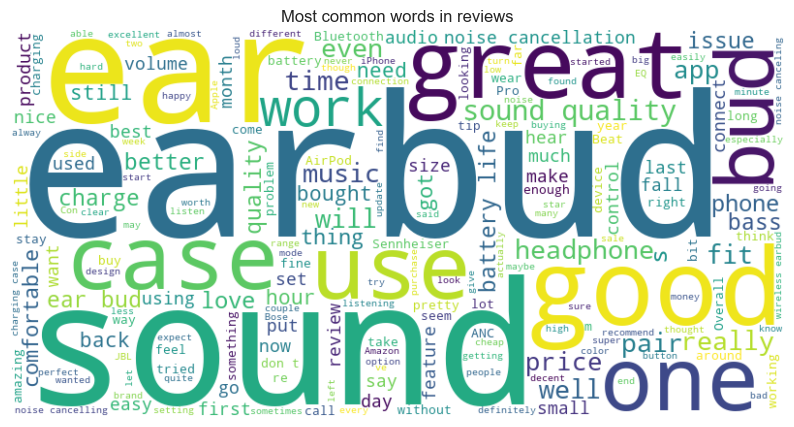

In [15]:
text = " ".join(review for review in df['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in reviews")
plt.show()

Most commonly cited words in overwhelmingly positive reviews (4.0 & 5.0 stars)

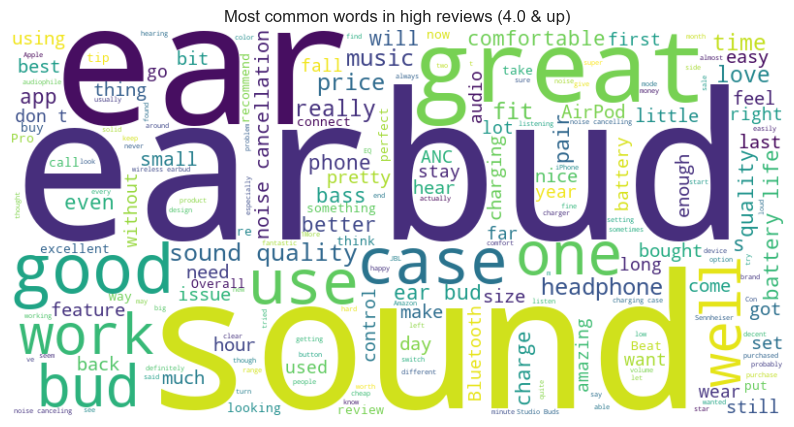

In [16]:
high_rated = " ".join(review for review in df[df['rating'] >= 4.0]['content'])
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

plt.figure(figsize = (10, 10))
plt.imshow(high_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in high reviews (4.0 & up)")
plt.show()

Most commonly cited words in overwhelmingly negative reviews (below 2.0)

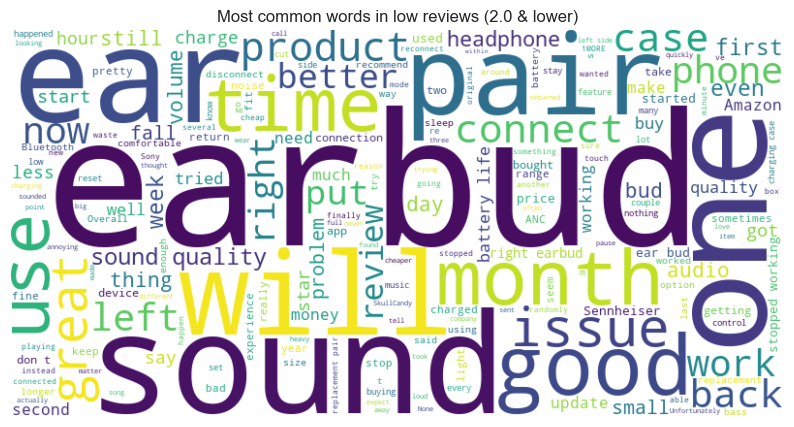

In [23]:
low_rated = " ".join(review for review in df[df['rating'] <= 2.0]['content'])
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

plt.figure(figsize = (10, 10))
plt.imshow(low_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in low reviews (2.0 & lower)")
plt.show()

#### <b>How do reviews vary across products or ratings</b>

Frequency distribution of words occuring in highly rated reviews

In [35]:
five_star_reviews = " ".join(review for review in df[df['rating'] >= 5.0]['content'])
tokens = word_tokenize(five_star_reviews.lower())

common_words = Counter(tokens).most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

sns.barplot(x = 'word', y = 'frequency', data = common_words_df)
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/andy/nltk_data'
    - '/Users/andy/miniconda3/nltk_data'
    - '/Users/andy/miniconda3/share/nltk_data'
    - '/Users/andy/miniconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


#### <b>Which products stand out in terms of customer sentiment and ratings?</b>